In [5]:
import os
import sys 
os.environ["SPARK_HOME"]="D:\\Code\\201511142\\spark-2.0.0-bin-hadoop2.6"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [6]:
for i in sys.path:
    print i

D:\Code\201511142\spark-2.0.0-bin-hadoop2.6\python\lib\pyspark.zip
D:\Code\201511142\spark-2.0.0-bin-hadoop2.6\python\lib\py4j-0.10.1-src.zip
C:\Users\400T6B\Downloads\spark-2.0.0-bin-hadoop2.6\python
C:\Users\400T6B\Downloads\spark-2.0.0-bin-hadoop2.6\python\lib\py4j-0.10.1-src.zip

C:\Users\400T6B\Anaconda2\python27.zip
C:\Users\400T6B\Anaconda2\DLLs
C:\Users\400T6B\Anaconda2\lib
C:\Users\400T6B\Anaconda2\lib\plat-win
C:\Users\400T6B\Anaconda2\lib\lib-tk
C:\Users\400T6B\Anaconda2
C:\Users\400T6B\Anaconda2\lib\site-packages
C:\Users\400T6B\Anaconda2\lib\site-packages\Sphinx-1.5.1-py2.7.egg
C:\Users\400T6B\Anaconda2\lib\site-packages\win32
C:\Users\400T6B\Anaconda2\lib\site-packages\win32\lib
C:\Users\400T6B\Anaconda2\lib\site-packages\Pythonwin
C:\Users\400T6B\Anaconda2\lib\site-packages\setuptools-27.2.0-py2.7.egg
C:\Users\400T6B\Anaconda2\lib\site-packages\IPython\extensions
C:\Users\400T6B\.ipython


In [7]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).config('spark.sql.warehouse.dir','file:///D:/Code/201511142/data').getOrCreate()

In [22]:
print spark.version
print spark.conf.get('spark.app.name')
print spark.conf.get('spark.master')
print spark.conf.get('spark.driver.host')
print spark.conf.get('spark.jars.packages')

2.0.0
pyspark-shell
local[*]
117.16.43.165


Py4JJavaError: An error occurred while calling o35.get.
: java.util.NoSuchElementException: spark.jars.packages
	at org.apache.spark.sql.internal.SQLConf$$anonfun$getConfString$2.apply(SQLConf.scala:735)
	at org.apache.spark.sql.internal.SQLConf$$anonfun$getConfString$2.apply(SQLConf.scala:735)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.sql.internal.SQLConf.getConfString(SQLConf.scala:735)
	at org.apache.spark.sql.RuntimeConfig.get(RuntimeConfig.scala:68)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:128)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:211)
	at java.lang.Thread.run(Unknown Source)


In [13]:
myList=[1,2,3,4,5,6,7]
myRdd1 = spark.sparkContext.parallelize(myList)
myRdd1.take(3)

[1, 2, 3]

In [14]:
print myRdd1

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:475


In [15]:
myRdd1.take(1)

[1]

In [7]:
%%writefile data/ds_spark_wiki.txt
Wikipedia
Apache Spark is an open source cluster computing framework.
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.
Apache Spark Apache Spark Apache Spark Apache Spark
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크
Originally developed at the University of California, Berkeley's AMPLab,
the Spark codebase was later donated to the Apache Software Foundation,
which has maintained it since.
Spark provides an interface for programming entire clusters with
implicit data parallelism and fault-tolerance.

Writing data/ds_spark_wiki.txt


In [ ]:
import os
#myDf=spark.read.text(".\\data\\ds_spark_wiki.txt")
myDf=spark.read.text("./data/ds_spark_wiki.txt")
print type(myDf)

In [8]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

Wikipedia


In [19]:
%%writefile ./data/ds_spark_2cols.csv
35, 2
40, 27
12, 38
15, 31
21, 1
14, 19
46, 1
10, 34
28, 3
48, 1
16, 2
30, 3
32, 2
48, 1
31, 2
22, 1
12, 3
39, 29
19, 37
25, 2

Writing ./data/ds_spark_2cols.csv


In [24]:
myRdd3 = spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_2cols.csv"))
myRdd3.take(5)

[u'35, 2', u'40, 27', u'12, 38', u'15, 31', u'21, 1']

In [28]:
myRdd4=myRdd3.map(lambda line: line.split(','))
myRdd4.take(5)

[[u'35', u' 2'],
 [u'40', u' 27'],
 [u'12', u' 38'],
 [u'15', u' 31'],
 [u'21', u' 1']]

In [31]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    f=list()
    for i in c:
        _f=(float(9)/5)*i+32
        f.append(_f)
    return f
print c2f(celsius)

[102.56, 97.7, 99.14, 100.03999999999999]


In [32]:
celsius = [39.2, 36.5, 37.3, 37.8]
def c2f(c):
    return (float(9)/5)*c + 32
f=map(c2f,celsius)
print f

[102.56, 97.7, 99.14, 100.03999999999999]


In [33]:
map(lambda x:(float(9)/5)*x+32,celsius)

[102.56, 97.7, 99.14, 100.03999999999999]

In [34]:
sentence='Hello World'
words=sentence.split()
print words

['Hello', 'World']


In [36]:
map(lambda x:x.split(),sentence)
sentence=["Hello World"]
map(lambda x:x.split(),sentence)

[['Hello', 'World']]

In [37]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
result=filter(lambda x:x%2,fib)
print result

[1, 1, 3, 5, 13, 21, 55]


In [38]:
reduce(lambda x,y:x+y,range(1,101))

5050

In [39]:
nRdd=spark.sparkContext.parallelize([1,2,3,4])
squared=nRdd.map(lambda x:x*x).collect()
print squared

[1, 4, 9, 16]


In [41]:
myRdd100 = spark.sparkContext.parallelize(range(1,101))
myRdd100.reduce(lambda x,y: x+y)

5050

In [42]:
print nRdd.sum(),nRdd.min(),nRdd.max(),nRdd.stdev(),nRdd.variance()

10 1 4 1.11803398875 1.25


In [44]:
words=myRdd2.map(lambda x:x.split(' '))

In [45]:
words.count()

10

In [4]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))
print myRdd2.first()

NameError: name 'spark' is not defined

In [15]:
def mySplit(x):
    return x.split(" ")

words=myRdd2.map(mySplit)
words.take(3)

[[u'Wikipedia'],
 [u'Apache',
  u'Spark',
  u'is',
  u'an',
  u'open',
  u'source',
  u'cluster',
  u'computing',
  u'framework.'],
 [u'\uc544\ud30c\uce58',
  u'\uc2a4\ud30c\ud06c\ub294',
  u'\uc624\ud508',
  u'\uc18c\uc2a4',
  u'\ud074\ub7ec\uc2a4\ud130',
  u'\ucef4\ud4e8\ud305',
  u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]

In [16]:
for line in words.collect():
    for word in line:
        print word,
    print "\n-----"

Wikipedia 
-----
Apache Spark is an open source cluster computing framework. 
-----
아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다. 
-----
Apache Spark Apache Spark Apache Spark Apache Spark 
-----
아파치 스파크 아파치 스파크 아파치 스파크 아파치 스파크 
-----
Originally developed at the University of California, Berkeley's AMPLab, 
-----
the Spark codebase was later donated to the Apache Software Foundation, 
-----
which has maintained it since. 
-----
Spark provides an interface for programming entire clusters with 
-----
implicit data parallelism and fault-tolerance. 
-----


In [18]:
myRdd2.map(lambda s:len(s)).collect()

[9, 59, 32, 51, 31, 72, 71, 30, 64, 46]

In [20]:
myRdd_unicode = myRdd2.filter(lambda line: u"스파크" in line)
print myRdd_unicode.first()

아파치 스파크는 오픈 소스 클러스터 컴퓨팅 프레임워크이다.


In [21]:
stopwords = ['is','am','are','the','for','a']
myRdd_stop = myRdd2.filter(lambda x: x not in stopwords)
myRdd_stop.take(5)

[u'Wikipedia',
 u'Apache Spark is an open source cluster computing framework.',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c\ub294 \uc624\ud508 \uc18c\uc2a4 \ud074\ub7ec\uc2a4\ud130 \ucef4\ud4e8\ud305 \ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.',
 u'Apache Spark Apache Spark Apache Spark Apache Spark',
 u'\uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c \uc544\ud30c\uce58 \uc2a4\ud30c\ud06c']

In [9]:
wc=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .groupByKey()\
    .mapValues(sum)\
    .sortByKey(True)\
    .take(10)

In [10]:
for e in wc:
    print e

(u'AMPLab,', 1)
(u'Apache', 6)
(u"Berkeley's", 1)
(u'California,', 1)
(u'Foundation,', 1)
(u'Originally', 1)
(u'Software', 1)
(u'Spark', 7)
(u'University', 1)
(u'Wikipedia', 1)


In [11]:
wc2=myRdd2\
    .flatMap(lambda x:x.split())\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .take(10)

In [12]:
print type(wc2)
for i in wc2:
    print i

<type 'list'>
(7, u'Spark')
(6, u'Apache')
(5, u'\uc544\ud30c\uce58')
(4, u'\uc2a4\ud30c\ud06c')
(3, u'the')
(2, u'an')
(1, u'and')
(1, u'\uc18c\uc2a4')
(1, u'is')
(1, u'Wikipedia')


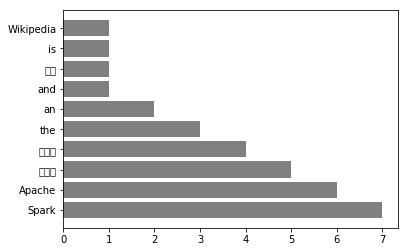

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt

count = map(lambda x: x[0], wc2)
word = map(lambda x: x[1], wc2)
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

In [14]:
%%writefile src/ds_spark_rdd_hello.py
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()

Writing src/ds_spark_rdd_hello.py


In [ ]:
!D:/Code/201511142/spark-2.0.0-bin-hadoop2.6/bin/spark-submit src/ds_spark_rdd_hello.py


In [ ]:
import pyspark
def doIt():
    print "---------RESULT-----------"
    print spark.version
    spark.conf.set("spark.logConf","false")
    rdd=spark.sparkContext.parallelize(range(1000), 10)
    print "mean=",rdd.mean()
    nums = spark.sparkContext.parallelize([1, 2, 3, 4])
    squared = nums.map(lambda x: x * x).collect()
    for num in squared:
        print "%i " % (num)

if __name__ == "__main__":
    myConf=pyspark.SparkConf()
    spark = pyspark.sql.SparkSession.builder\
        .master("local")\
        .appName("myApp")\
        .config(conf=myConf)\
        .getOrCreate()
    doIt()
    spark.stop()